# The Dataset I chose is Solar Radiation Prediction Dataset.
## Below is a description from the kaggle page
The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature. The response parameter that is to be predicted is: "Solar_radiation". It contains measurements for the past 4 months and you have to predict the level of solar radiation.
Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?


## About this file:
These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results

The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results

The date in yyyy-mm-dd format

The local time of day in hh:mm:ss 24-hour format

The numeric data, if any (may be an empty string)

The text data, if any (may be an empty string)

The units of each dataset are:

*   Solar radiation: watts per meter^2
*   Temperature: degrees Fahrenheit
*   Humidity: percent
*   Barometric pressure: Hg
*   Wind direction: degrees
*   Wind speed: miles per hour
*   Sunrise/sunset: Hawaii time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import io
from google.colab import files
import csv

uploaded = files.upload()
solar_df = pd.read_csv(io.StringIO(uploaded['SolarPrediction.csv'].decode('utf-8')))

Saving SolarPrediction.csv to SolarPrediction.csv


# Ad. assignment 2

Model score: 0.6293660372534802
Intercept: -2326.142
Slope: 47.246
Mean squared error equals: 45606.0440004959


Text(0, 0.5, 'Radiation')

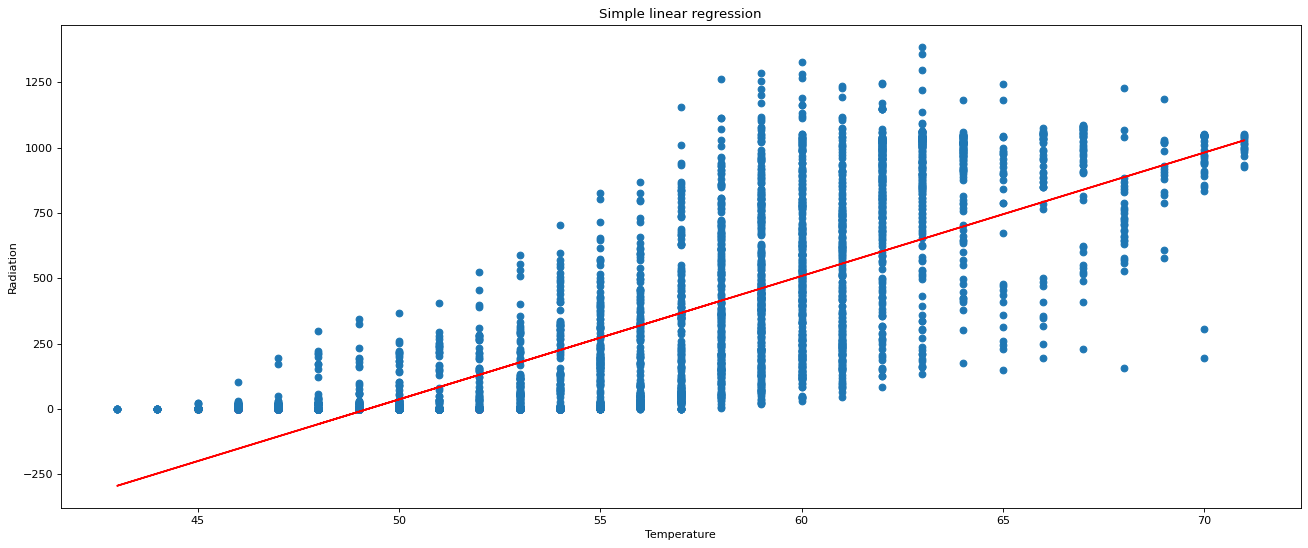

In [2]:
# 1a) 1b)

X = solar_df.Temperature.values.reshape(-1,1)[:5000]
y = solar_df.Radiation.values.reshape(-1)[:5000]

model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1) 
model.fit(X, y)

model_score = model.score(X, y)
print(f"Model score: {model_score}")

print('Intercept: %.3f' % model.intercept_)
print('Slope: %.3f' % model.coef_[0])
y_pred = model.predict(X)
mean = mean_squared_error(y, y_pred)
print(f"Mean squared error equals: {mean}")

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.title('Simple linear regression')
plt.xlabel('Temperature')
plt.ylabel('Radiation')

Conclusions: As we can see, linear regression doesn't show good results for this dataset, especially for lower temperatures where radiation is negative.

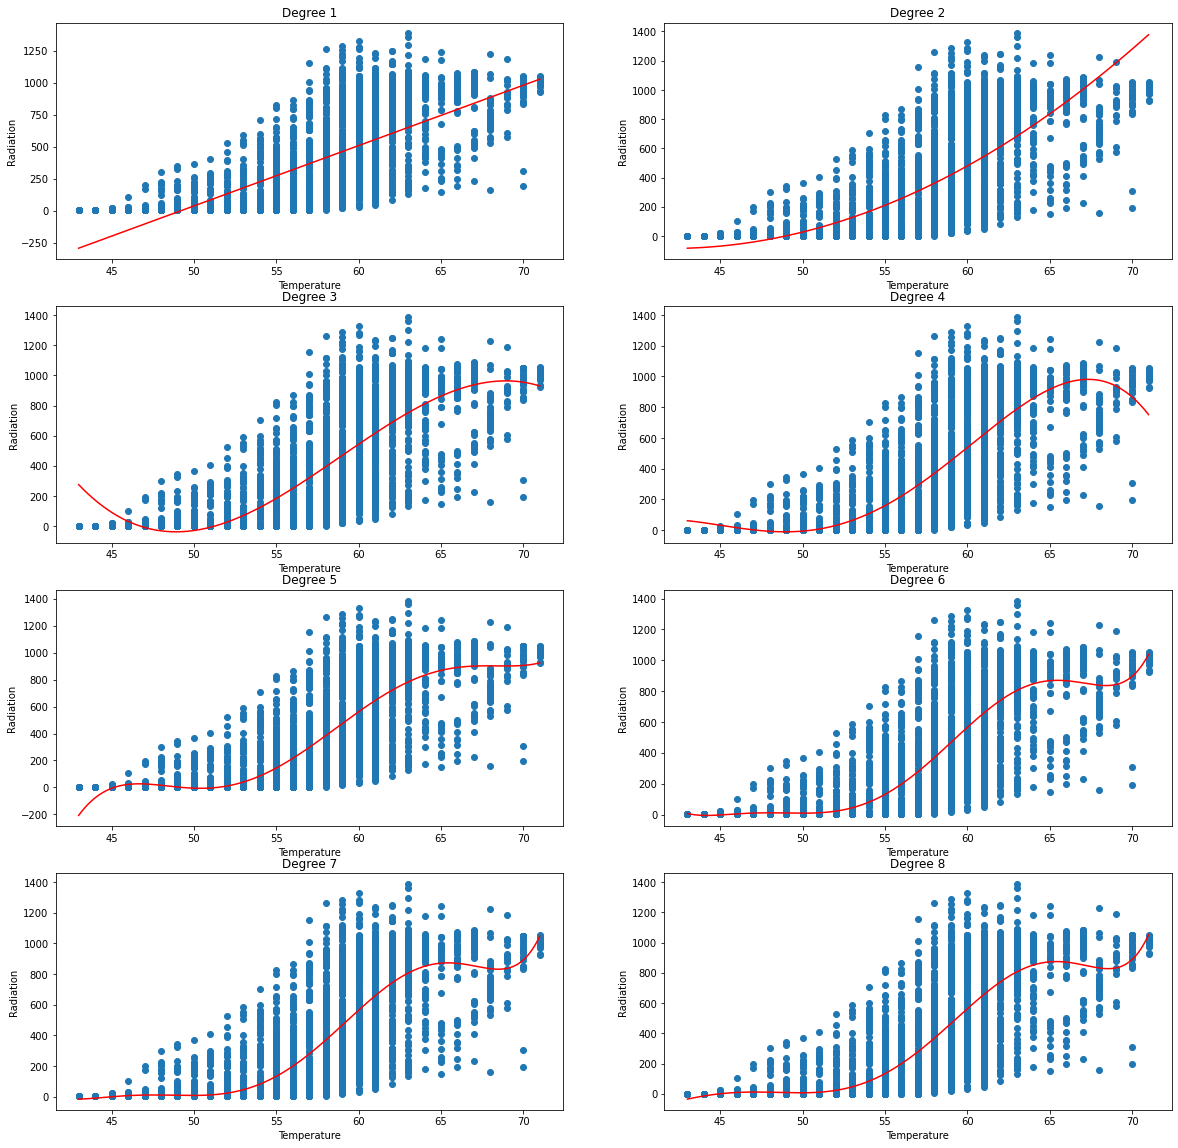

In [4]:
# 1c)

degree = []
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
axs = np.ravel(axs)
for order in range(1,9):
    
  poly = PolynomialFeatures(order, include_bias = False)
  X_order = poly.fit_transform(X)

  #Your code:

  modell = LinearRegression().fit(X_order, y)
  X_fit = np.linspace(min(X), max(X), 5000).reshape(5000, -1)

  y_predict = modell.predict(poly.fit_transform(X_fit))

  axs[order - 1].scatter(X, y)
  axs[order - 1].plot(X_fit, y_predict, color="red")

  axs[order - 1].set_title('Degree ' + str(order))
  axs[order - 1].set_xlabel('Temperature')
  axs[order - 1].set_ylabel('Radiation')

  y__pred = modell.predict(X_order)
  mean = mean_squared_error(y, y__pred)
  degree.append(mean)

axs = np.reshape(axs, (4, 2))

Conclusions: The higher degree of polynomial regression, the more accurate the model is. The models for degrees 6-8 are very similar and negative radiation is no longer present.

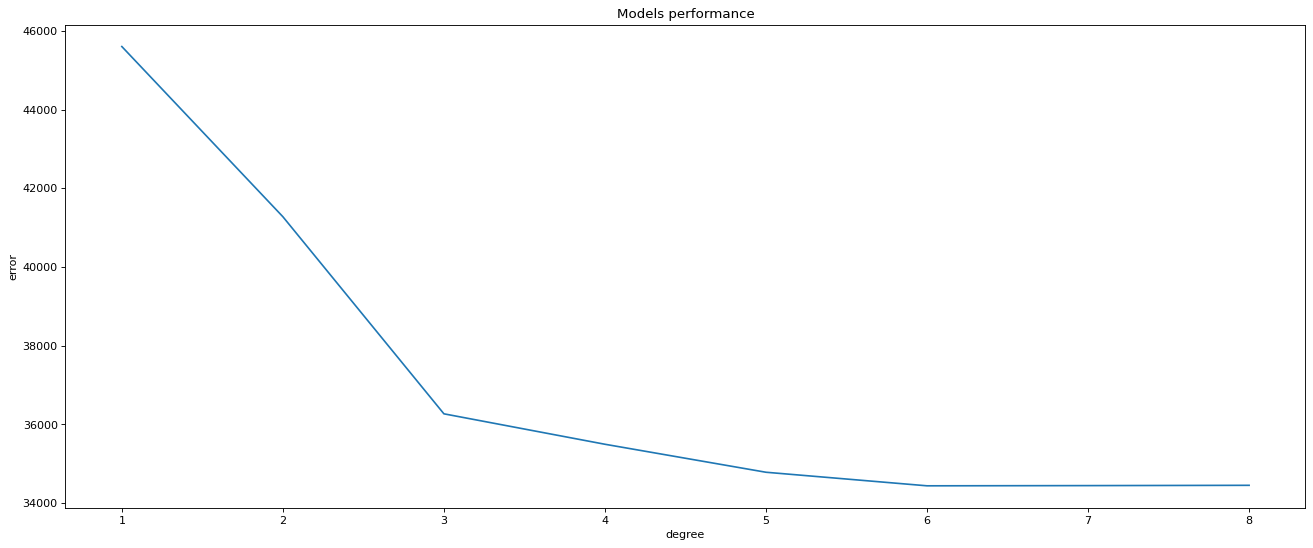

In [5]:
degree
plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(np.arange(len(degree)), np.arange(1, len(degree)+1))
plt.title('Models performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.plot(degree)

Conclusions: As we can see, the error decreases with the higher degree, but for the values 6-8 is almost the same.

In [6]:
# 2a)

degree2 = []
degree3 = []
for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47)

    x_train_trans = poly.fit_transform(X_train)
    x_test_trans = poly.transform(X_test)
    
    modelll = LinearRegression()
    modelll.fit(x_train_trans, y_train)

    y_train_pred = modelll.predict(x_train_trans)
    y_test_pred = modelll.predict(x_test_trans)

    mean_test = mean_squared_error(y_test_pred, y_test)
    mean_train = mean_squared_error(y_train_pred, y_train)
    degree2.append(mean_test)
    degree3.append(mean_train)

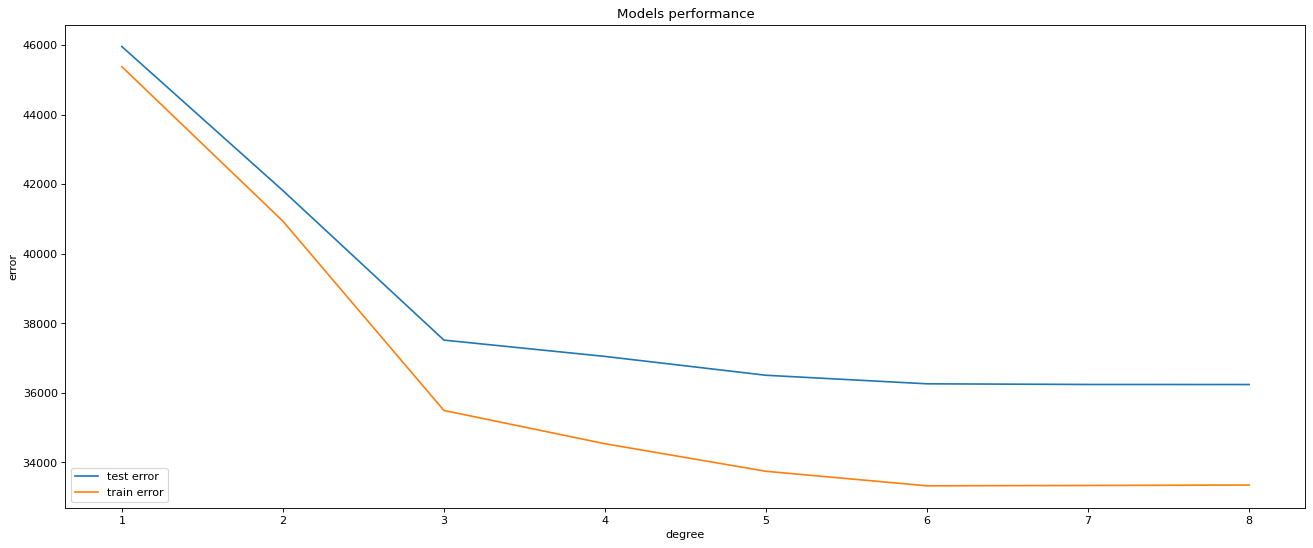

In [7]:
degree2
plt.figure(figsize=(20, 8), dpi=80)
plt.xticks(np.arange(len(degree2)), np.arange(1, len(degree2)+1))
plt.title('Models performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.plot(degree2, label='test error')
plt.plot(degree3, label='train error')
plt.legend(loc='lower left')

Conclusions: As we can see the train data set has less error than the test data set.

Mean squared error equals: 73.21293472406138


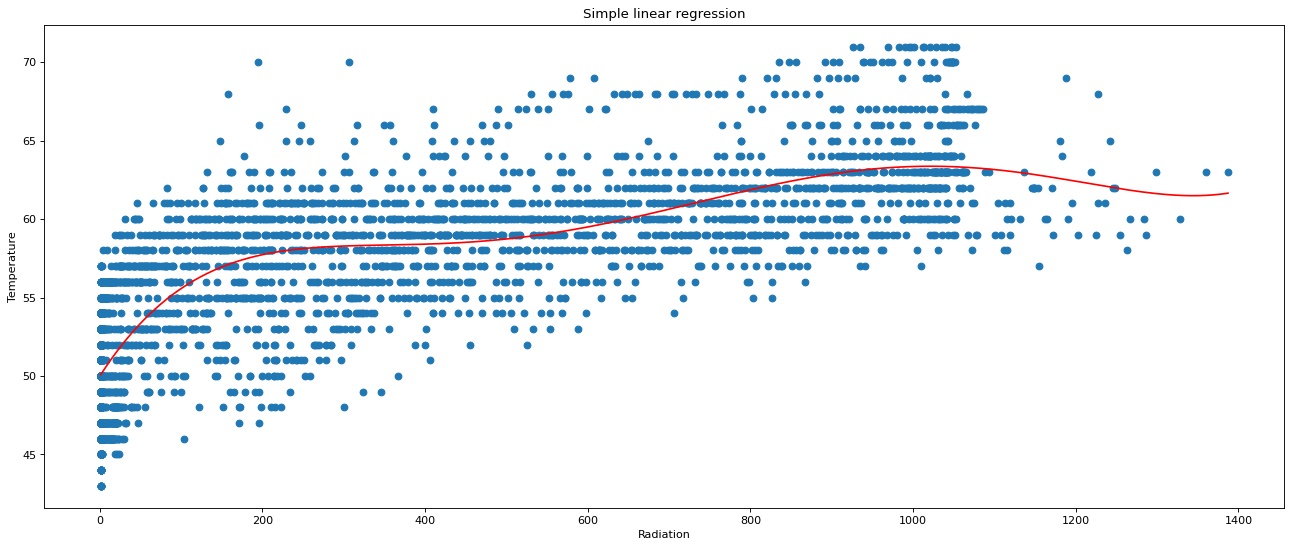

In [8]:
# 3a)

X = solar_df.Radiation.values.reshape(-1, 1)[:5000]
y = solar_df.Temperature.values.reshape(-1)[:5000]


poly = PolynomialFeatures(5, include_bias = False)
X_order = poly.fit_transform(X)

modell = LinearRegression().fit(X_order, y)
X_fit = np.linspace(min(X), max(X), 5000).reshape(5000, -1)

y_predict = modell.predict(poly.fit_transform(X_fit))

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X, y)
plt.plot(X_fit, y_predict, color="red")
plt.title('Simple linear regression')
plt.xlabel('Radiation')
plt.ylabel('Temperature')

mean = mean_squared_error(y, y_predict)
print(f"Mean squared error equals: {mean}")

Conclusions: Polynomial regression between Radiation and Temperature. As we can see MSE is less than for the 1b plot.

In [9]:
# 3b)
# model 1
X = solar_df[['Temperature', 'Humidity']].values.reshape(-1,2)
y = solar_df.Radiation.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 37354.56399867608


In [10]:
# model 2

X = solar_df[['Temperature', 'Humidity']].values.reshape(-1,2)
y = solar_df.Radiation.values.reshape(-1)

poly = PolynomialFeatures(5, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 36240.66905273879


In [11]:
# model 3
X = solar_df[['Temperature', 'Humidity']].values.reshape(-1,2)
y = solar_df.Radiation.values.reshape(-1)

poly = PolynomialFeatures(10, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=38)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 33934.63256946728


Conclusions: The best improvement of MSE I got for model 3 after decreasing test size to 0.1 and changing the random state value to 38 and for polynomial regressions degree of 10.

# Ad. assignment 3

In [12]:
X = solar_df.Temperature.values.reshape(-1,1)[:500]
X2 = solar_df.Temperature.values.reshape(-1,1)[:500]
y = solar_df.Radiation.values.reshape(-1,1)[:500]
print(np.shape(X))
print(np.shape(y))

(500, 1)
(500, 1)


In [13]:
# 1a)
def predict(b, X):
    result = np.zeros((len(X), 1))
    for i in range(len(X)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += X[i][k] * b[k][j]
    return result

def cost(y_pred, y_true):
    return np.linalg.norm(y_pred - y_true)**2/len(y_true)



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6.]
 [11.]
 [12.]
 [16.]]
82.75000000000001


7


Text(0, 0.5, 'Radiation')

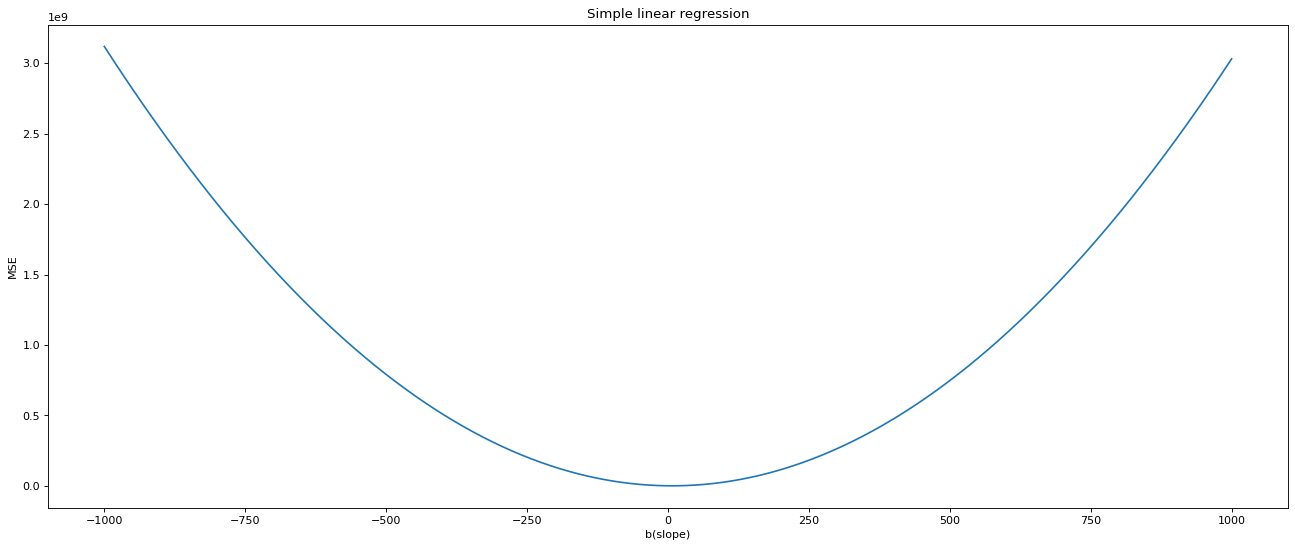

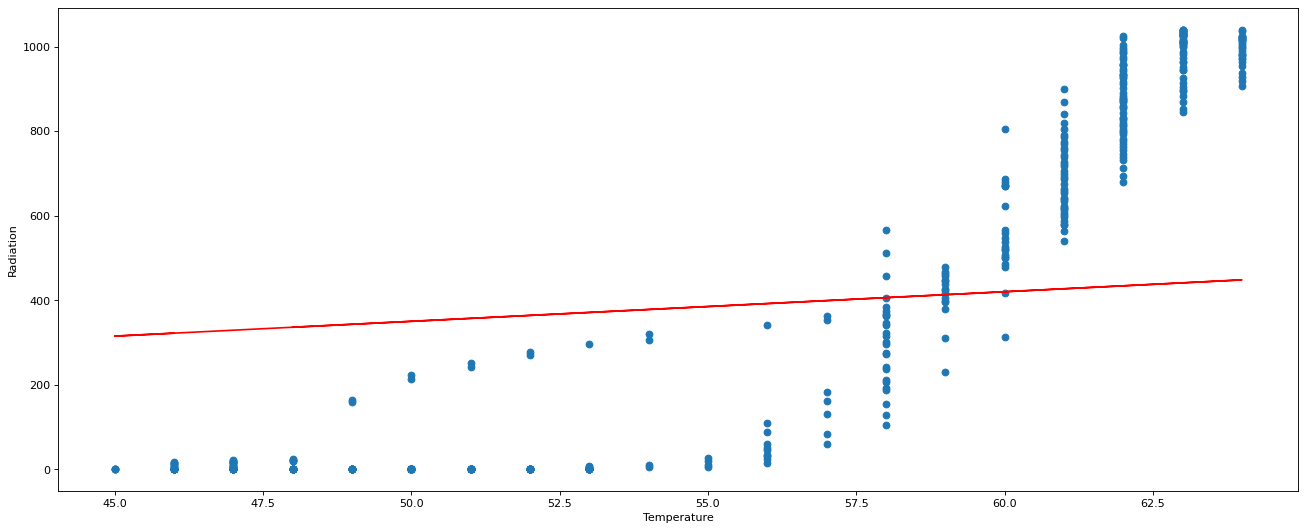

In [14]:
# 1b)

table = []
x_table = []

for i in range(-1000, 1001, 1):
  b = np.array([[i]])
  x_table.append(i)
  predict(b, X)
  mse = cost(predict(b, X), y)
  table.append(mse)

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(x_table, table)
plt.title('Simple linear regression')
plt.xlabel('b(slope)')
plt.ylabel('MSE')

b_max = 0
for j in range(len(table)):
  if table[j] == min(table):
    b_max = j
    b_max -= 1000
print(b_max)

y_predd = predict(np.array([[b_max]]), X)
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X, y)
plt.plot(X, y_predd, color="red")
plt.xlabel('Temperature')
plt.ylabel('Radiation')

Conclusions: We got the line with best slope among evaluated with cost function.

In [15]:
# 2a)

X = np.c_[X, np.ones(500)]
print(np.shape(X))

(500, 2)


25.0


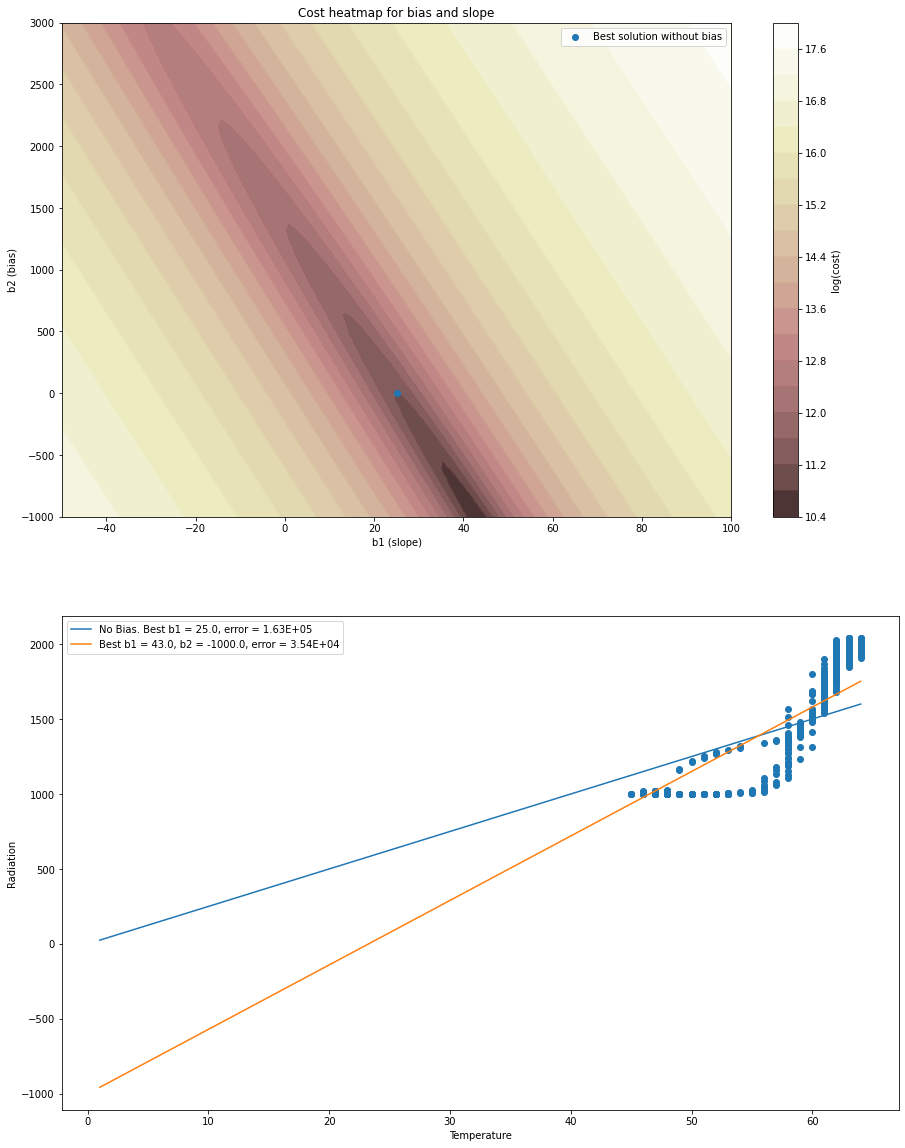

In [16]:
# 2b)
y_shifted = y+1000

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
#X_arr = np.array([X[:,0]])
cost_arr = [cost(predict(np.array([[b]]), np.array([X[:,0]])), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]

table1 = []
x_table1 = []
for i in np.linspace(-1000, 1000, num=2001):
  b = np.array([[i]])
  x_table1.append(i)
  predict(b, X2)
  mse = cost(predict(b, X2), y_shifted)
  table1.append(mse)

best_b1 = x_table1[np.argmin(table1)]
print(best_b1)


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-50, 100, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1000, 3000, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("Temperature")
plt.ylabel("Radiation")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

Conclusions: As we can see, adding the bias improved error.

In [17]:
# 3a)

def standardize(X):
    means = np.mean(X, axis = 0)
    sds = np.std(X, axis = 0)
    return (X - means) / sds, means, sds

# 3b)
def destandardize(X, means, sds):
    for i in range(len(X)):
      X[i] = X[i] * sds + means
    return X


#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]

stand, means, sds = standardize(W)
print(stand)
destand = destandardize(stand, means, sds)
print(destand)

[[-1.34164079 -1.63299316 -1.18321596]
 [-0.4472136   0.81649658 -0.50709255]
 [ 0.4472136   0.          0.16903085]
 [ 1.34164079  0.81649658  1.52127766]]
[[1. 2. 3.]
 [2. 5. 4.]
 [3. 4. 5.]
 [4. 5. 7.]]


Text(0, 0.5, 'price')

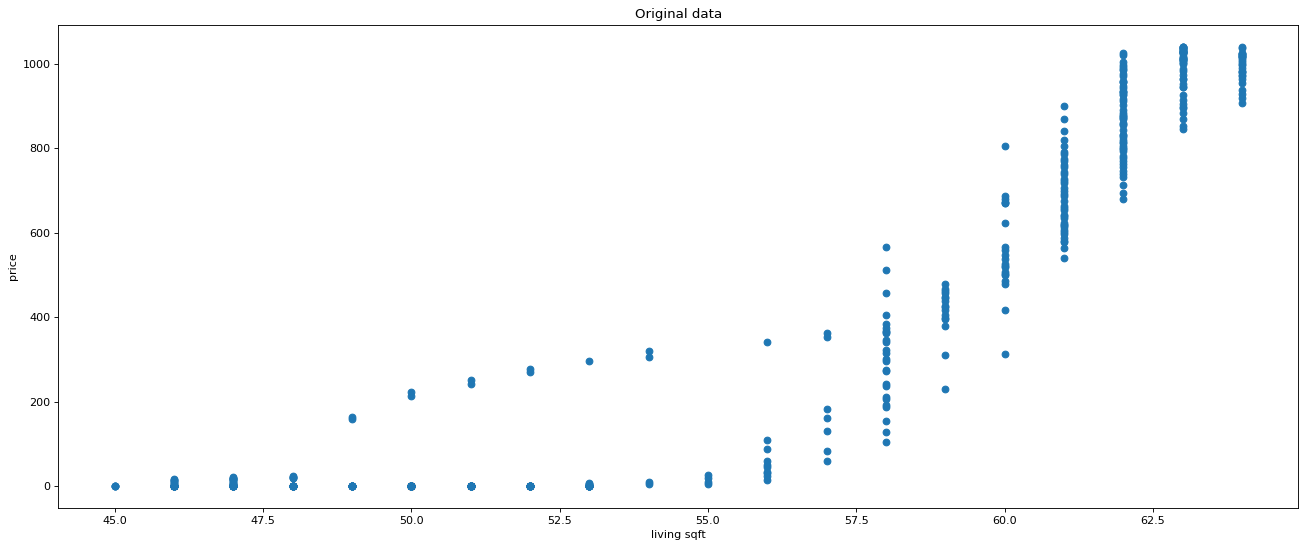

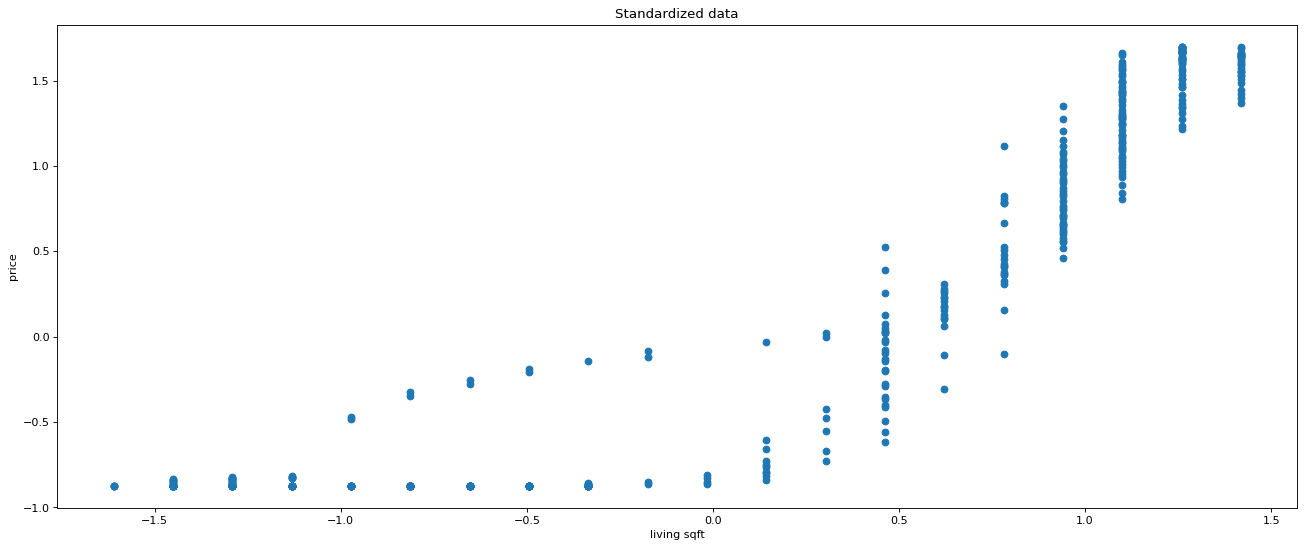

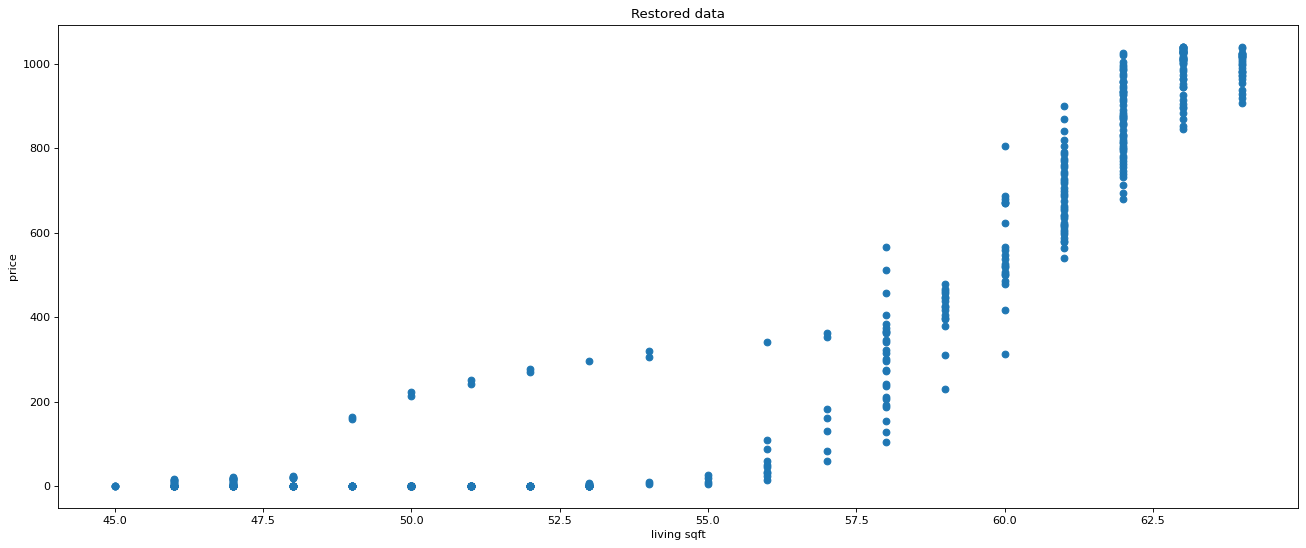

In [18]:
# 3c)

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X2, y)
plt.title("Original data")
plt.xlabel('living sqft')
plt.ylabel('price')

X_stand, mik, mik2 = standardize(X2)
y_stand, mik1, mik3 = standardize(y)

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X_stand, y_stand)
plt.title("Standardized data")
plt.xlabel('living sqft')
plt.ylabel('price')

X_destand = destandardize(X_stand, mik, mik2)
y_destand = destandardize(y_stand, mik1, mik3)

plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(X_destand, y_destand)
plt.title("Restored data")
plt.xlabel('living sqft')
plt.ylabel('price')

Conclusions: As we can see, in the second plot we got standardized data and in the last plot, we were able to recover the data.

In [19]:
# 4a)

def gradient(b, X, y):
    n = X.shape[0]
    return (2 * np.transpose(X)).dot(X.dot(b)-y)/n
    

def gradient_descent_step(b, X, y, lr):
    n = X.shape[0]
    return b - lr * gradient(b, X, y)


#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


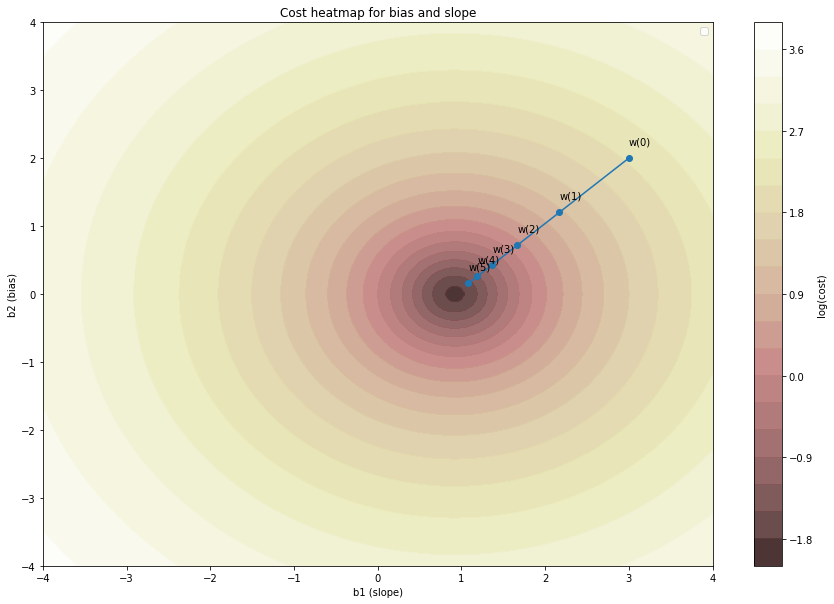

In [20]:
# 4b)

start_b = np.array([[3],[2]])
lr = 0.2

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X2.copy()
X_stand, o, oo = standardize(X_stand)
X_stand = np.c_[X_stand, np.ones(500)]

y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

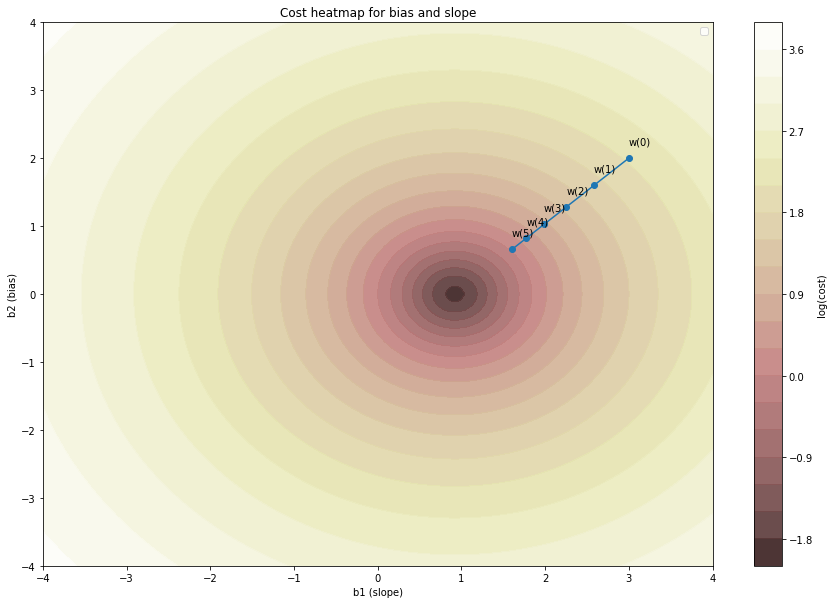

In [21]:
start_b = np.array([[3],[2]])
lr = 0.1

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X2.copy()
X_stand, o, oo = standardize(X_stand)
X_stand = np.c_[X_stand, np.ones(500)]

y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

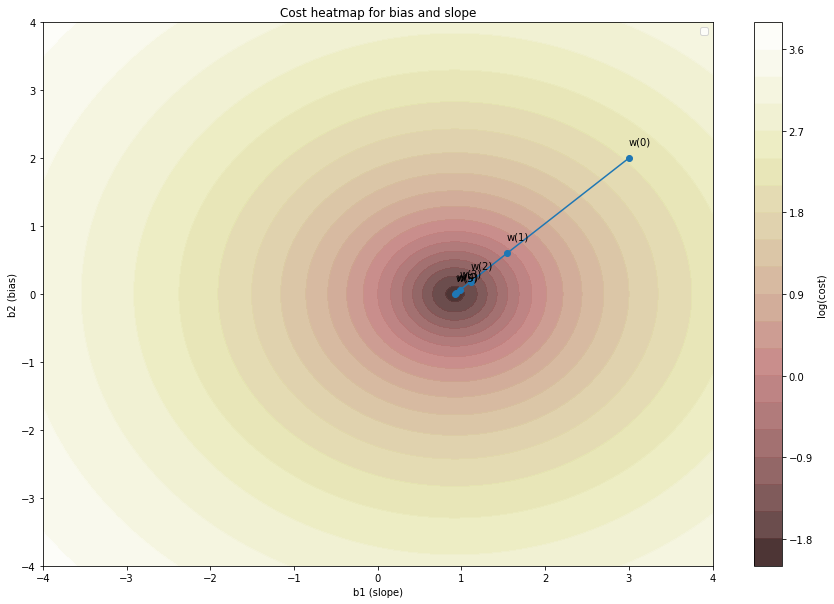

In [22]:
start_b = np.array([[3],[2]])
lr = 0.35

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X2.copy()
X_stand, o, oo = standardize(X_stand)
X_stand = np.c_[X_stand, np.ones(500)]

y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

Conclusions: For larger lr values jumps between points in first steps are higher than for lower lr values.

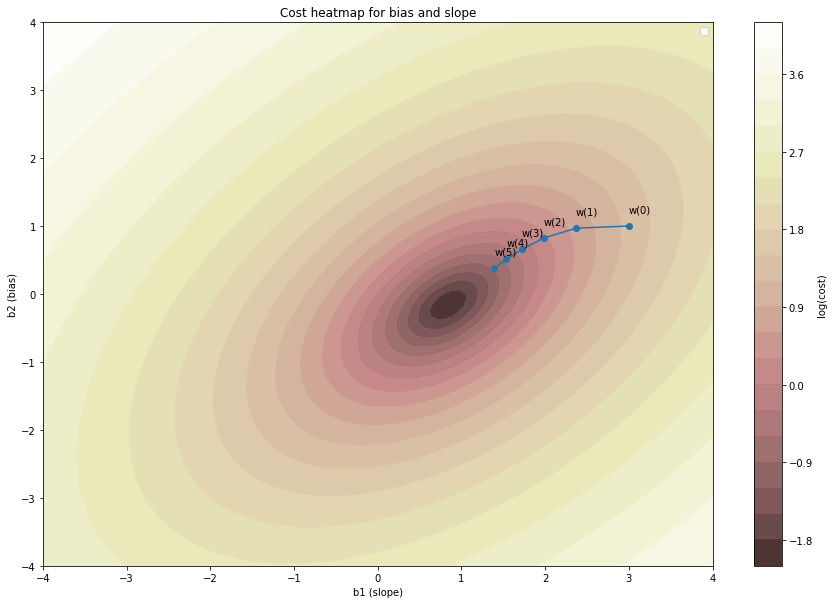

In [ ]:
# 4c)
X = [solar_df.Temperature.values[:500], solar_df.Humidity.values[:500]]
X = np.array(X).T

start_b = np.array([[3],[1]])
lr = 0.2

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X.copy()
X_stand, oo, oooo = standardize(X_stand)


y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

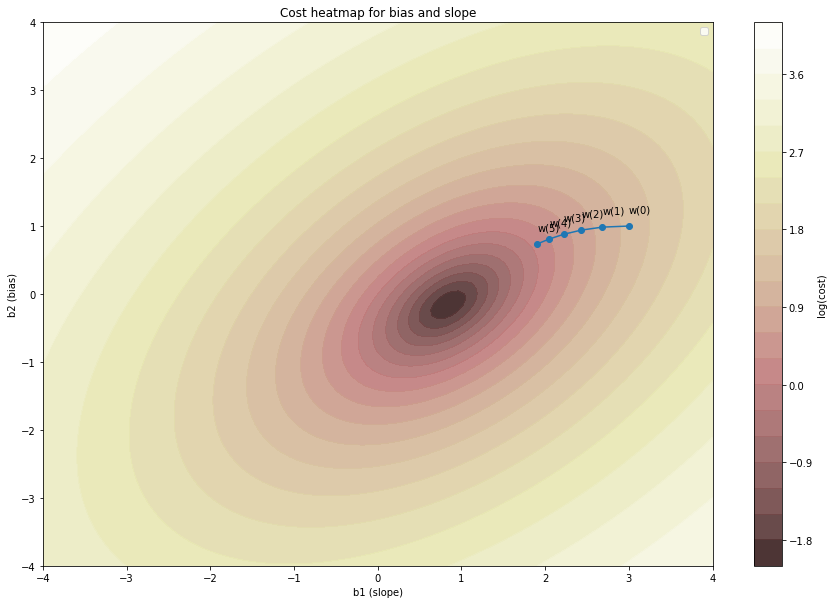

In [23]:
X = [solar_df.Temperature.values[:500], solar_df.Humidity.values[:500]]
X = np.array(X).T

start_b = np.array([[3],[1]])
lr = 0.1

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X.copy()
X_stand, oo, oooo = standardize(X_stand)


y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

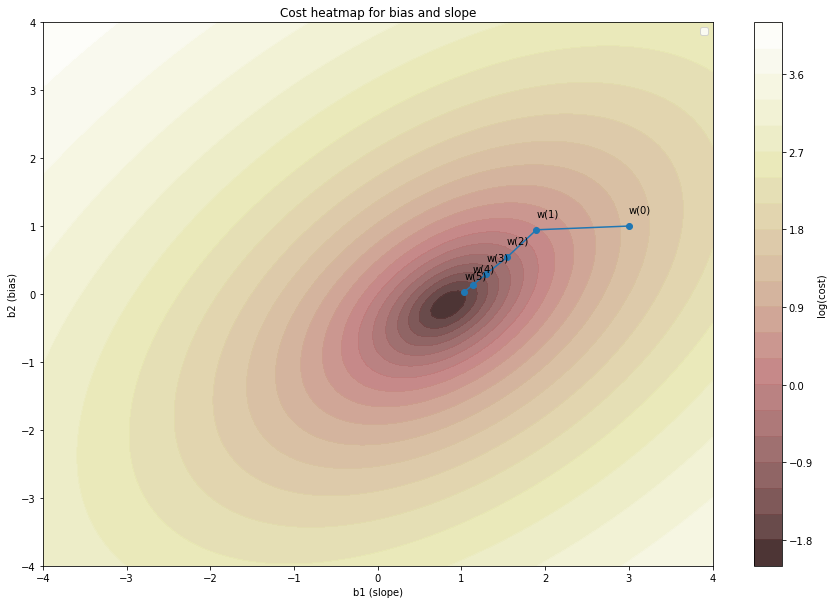

In [24]:

X = [solar_df.Temperature.values[:500], solar_df.Humidity.values[:500]]
X = np.array(X).T

start_b = np.array([[3],[1]])
lr = 0.35

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X.copy()
X_stand, oo, oooo = standardize(X_stand)


y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

Conclusions: For larger lr values jumps between points in first steps are higher than for lower lr values, so the situation is the same as in 4b).

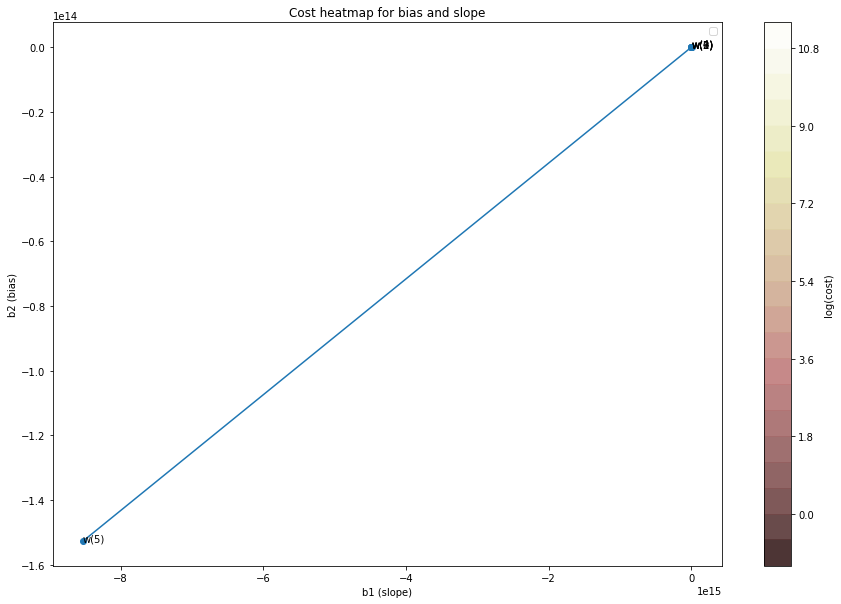

In [ ]:
# 4d)

start_b = np.array([[3],[2]])
lr = 0.2

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = np.c_[X2, np.ones(500)]
y_stand, yy, yyyy = standardize(y.copy())

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

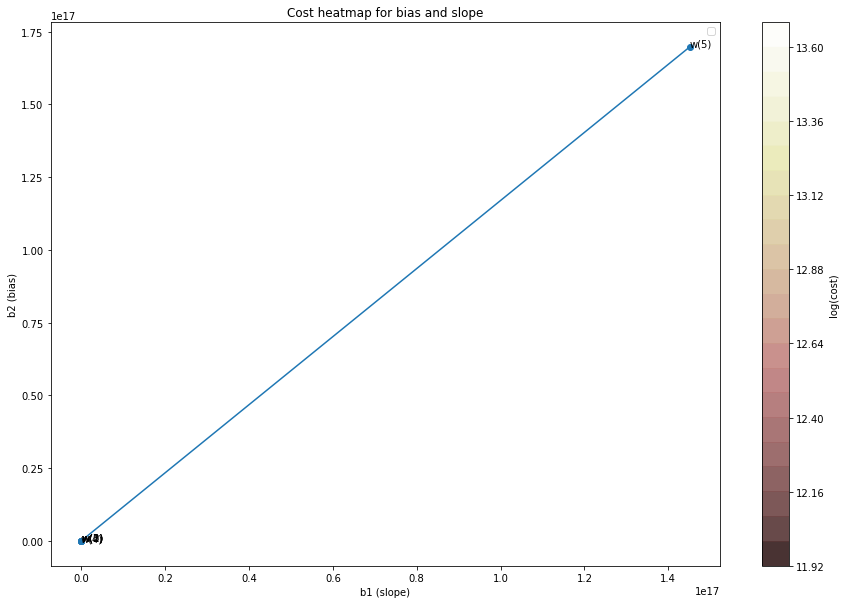

In [ ]:

X = [solar_df.Temperature.values[:500], solar_df.Humidity.values[:500]]
X = np.array(X).T

start_b = np.array([[3],[1]])
lr = 0.2

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-4, 4, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-4, 4, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

X_stand = X.copy()
y_stand = y.copy()

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_stand) , y_stand)

steps = []
steps.append(start_b)
for i in range(5):
  start_b = gradient_descent_step(start_b, X_stand, y_stand, lr)
  steps.append(start_b)
steps = np.array(steps)

plt.figure(figsize=(15,10)) 
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
plt.plot(steps[:, 0], steps[:, 1], marker='o')
labels = ["w(0)", "w(1)", "w(2)", "w(3)", "w(4)", "w(5)"]
for i in range(len(labels)):
  plt.annotate(labels[i], (steps[i, 0], steps[i, 1] + 0.2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

Conclusions: Since the data is not standardized, there are large discrepancies between them and we see by the scale of axis that it is larger.